# Task-1

## Submitted By - Rohit Munger

## Predict the percentage of marks of an student based on the number of study hours

## Linear Regression
In this task we will predict the percentage of the marks student will get based on the number of hours they studied. It is simple linear regression model as it has only independent variable is hours of study.

### Importing all the required libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data from url

In [12]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("sample of the data: ")
df.head(8)

sample of the data: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [3]:
print("Total num of entries =",len(df))

Total num of entries = 25


### Basic info of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Statistical Information of data

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Check for missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### Data Preprocessing

### Plotting the values(Hours vs Score)

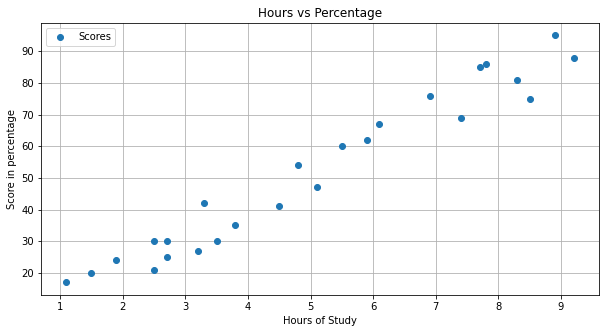

In [7]:
df.plot(x='Hours',y='Scores',style='o',figsize=(10,5))
plt.title("Hours vs Percentage")
plt.xlabel("Hours of Study")
plt.ylabel("Score in percentage")
plt.grid()
plt.show()

### Dividing the data into Attributes and Labels

In [8]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values


In [9]:
print("Attributes: ",X)
print("Labels: ",Y)


Attributes:  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Labels:  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting the data into train and test data

In [10]:
# We'll split the data using sklearn builtin function train_test_split
# As the dataset is too small dataset we'll devide the data in 80:20 percentage ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [11]:
print(f"X_train has {len(X_train)} entries of shape {X_train.shape}")
print(f"X_test has {len(X_train)} entries of shape {X_test.shape}")

X_train has 20 entries of shape (20, 1)
X_test has 20 entries of shape (5, 1)


In [13]:
print("Y_train: ",Y_train.shape)
print("Y_test: ",Y_test.shape)


Y_train:  (20,)
Y_test:  (5,)


### Training the Model

### Fitting the regression model on X_train data

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

### Plotting the regressor model

In [15]:
#First we'll write the equation for the line ie Y= mX+c for our model
line = (regressor.coef_*X)+regressor.intercept_

# regressor.coef_ and intercept_ are the parameters the model has learn't using training data


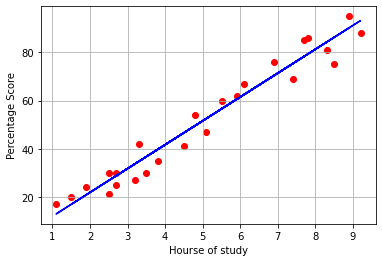

In [16]:

# Plotting the fitted line of the regressor
plt.scatter(X,Y,color='red')
plt.plot(X, line, color='blue')
plt.xlabel("Hourse of study")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

### Making predictions on test data and comparing with original values

In [17]:
predictions = regressor.predict(X_test)
print("Test Predictions are: ",predictions)

Test Predictions are:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
# Comparing the test predictions with original values
comapred_data = pd.DataFrame({"Original score":Y_test,"Predicted score":predictions})

In [19]:
comapred_data

,Original score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# Checking the model accuracy
accuracy = regressor.score(X_test,Y_test)
print(f"Accuracy of the model is: {round(accuracy*100,2)} %")

Accuracy of the model is: 94.55 %


In [21]:
new_values = [[8.00],[3.75],[7.45],[6.50],[5.25]]
new_predictions = regressor.predict(new_values)

In [22]:
new_predictions

array([81.30341189, 39.18312184, 75.85255082, 66.43742717, 54.04910656])

In [23]:
# Printing the new instances of hours and there respective predicted values
new_data = pd.DataFrame({"Predicted score":new_predictions})
new_data

,Predicted score
0,81.303412
1,39.183122
2,75.852551
3,66.437427
4,54.049107


In [24]:
# Predicting the score for Hrs = 9.25
Hrs = 9.25
prediction = regressor.predict([[Hrs]])
print("Hours of study: ",Hrs)
print(f"Predicted score in % is: {round(prediction[0],2)} %")

Hours of study:  9.25
Predicted score in % is: 93.69 %


### Evaluating different model using same data
### To see how different model will perform on same data we will evaluate performance of algorihtm. We will use two metrics : mean square error and mean absolute error

In [25]:
from sklearn import metrics

print("Mean Square Error: ",metrics.mean_squared_error(Y_test,predictions))
print("Root mean square error: ",metrics.mean_absolute_error(Y_test,predictions))

Mean Square Error:  21.5987693072174
Root mean square error:  4.183859899002975


### Thank you !

### By - Rohit Munger

# ##Rohit 